Darkviolet - shortest wavelength, around 400-420 nanometers with highest frequency.
Indigo - 420 - 440 nm
Blue - 440 - 490 nm
Green - 490 - 570 nm
Yellow - 570 - 585 nm
Orange - 585 - 620 nm
Red - 620 - 780 nm

In [307]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  #for data input and cleaning
import itertools  #for looping through arrays for plotting

#for interactive figure
%matplotlib notebook  
from matplotlib.widgets import Cursor

<IPython.core.display.Javascript object>


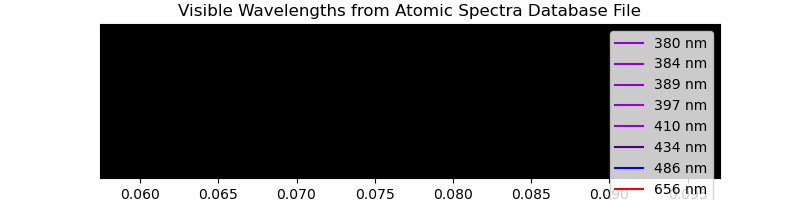

In [312]:
#user edits filename to read
filename = 'H_lines1.csv'

#import wavelength data into panda dataframe (only use wavelength column)
df = pd.read_csv(filename, usecols=['obs_wl_vac(nm)'])
df.dropna(how='any')  #drop null entries
df = df['obs_wl_vac(nm)'].map(lambda x: x.lstrip('="').rstrip('"'))  #remove unecessary characters
df = df.astype({'obs_wl_vac(nm)': np.float64})  #convert string/object to float
df = df.round(0).astype(int)  #round float to integer
df = df.drop_duplicates()  #remove duplicate integers
#print(df.dtypes)  #un-comment to check type (we want integer)
#print(df)  #un-comment to view data output

#look at visible wavelengths only
wavelengths = df[(df >= 380) & (df <= 700)]  

#wavelengths = np.array([150, 440, 510, 570, 656, 810])  #dummy data (un-comment to test plotting)

colors = np.array(['darkviolet', 'indigo', 'blue', 'green', 'yellow', 'orange','red'])  #major visible colors

#initiate plot
fig, ax = plt.subplots(figsize=(8, 2))
plt.xlim(370, 710)
plt.ylim(0, 1)
plt.xticks=np.arange(300, 800, 100)
ax.set_facecolor('black')
plt.yticks([],[])
plt.axvline(369, linestyle='dotted', color='white')  #dotted lines around visible spectrum
plt.axvline(701, linestyle='dotted', color='white')
plt.xlabel('Wavelength (nm)')
plt.title('Visible Wavelengths from Atomic Spectra Database File')


#loop through data and plot a vertical line for each visible wavelength
for position, color in itertools.zip_longest(wavelengths, colors):
    if position >= 380 and position <= 700:
        if position >= 380 and position < 420:
            plt.axvline(position, color=colors[0], label=str(position) + ' nm')
        elif position >= 420 and position < 440:
            plt.axvline(position, color=colors[1], label=str(position) + ' nm')
        elif position >= 440 and position < 490:
            plt.axvline(position, color=colors[2], label=str(position) + ' nm')
        elif position >= 490 and position < 570:
            plt.axvline(position, color=colors[3], label=str(position) + ' nm')
        elif position >= 570 and position < 585:
            plt.axvline(position, color=colors[4], label=str(position) + ' nm')
        elif position >= 585 and position < 620:
            plt.axvline(position, color=colors[5], label=str(position) + ' nm')
        elif position >= 620 and position <= 700:
            plt.axvline(position, color=colors[6], label=str(position) + ' nm')
    else:
        pass

#put legend outside of plot, draggable
leg = plt.legend(bbox_to_anchor=(1, 1)).set_draggable(True)  

#view x,y values for cursor point
cursor = Cursor(ax, horizOn=False, vertOn=True, useblit=True, color = 'white', linewidth = 1)  

#plt.savefig('visiblespectra.png',bbox_inches='tight')  #un-comment to save figure
plt.show()

